In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# 1 Load Local Dataset
df = pd.read_csv('Titanic-Dataset.csv')
print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Basic Overview
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Info:")
print(df.info())

Shape of dataset: (891, 12)

Columns:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
#  Summary Statistics
print("\nSummary Statistics (Numerical Columns):")
df.describe()


Summary Statistics (Numerical Columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print("\nSummary Statistics (Categorical Columns):")
df.describe(include='object')


Summary Statistics (Categorical Columns):


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
print("\n Missing Values per Column:")
print(df.isnull().sum())


 Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


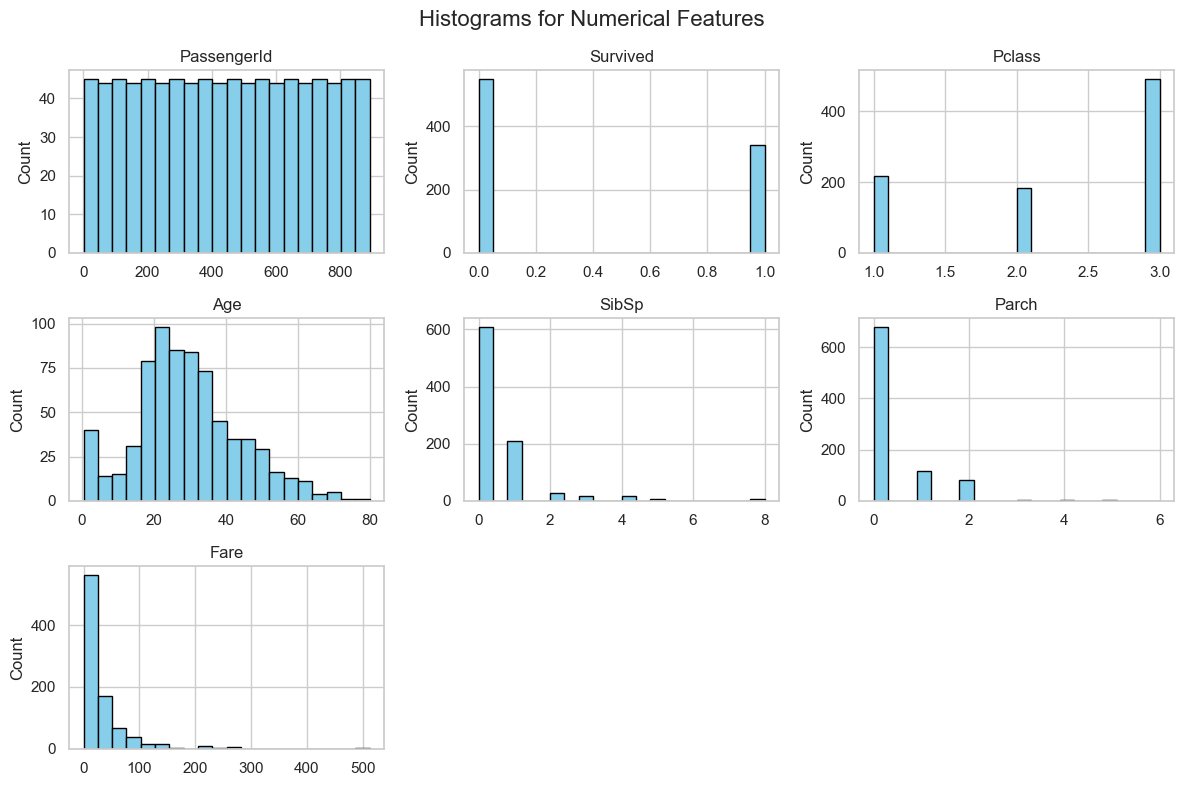

In [10]:
#  Histograms for Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

axes=df[numeric_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
for ax, col in zip(axes.flatten(), numeric_cols):       
    ax.set_ylabel("Count") 
plt.suptitle("Histograms for Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

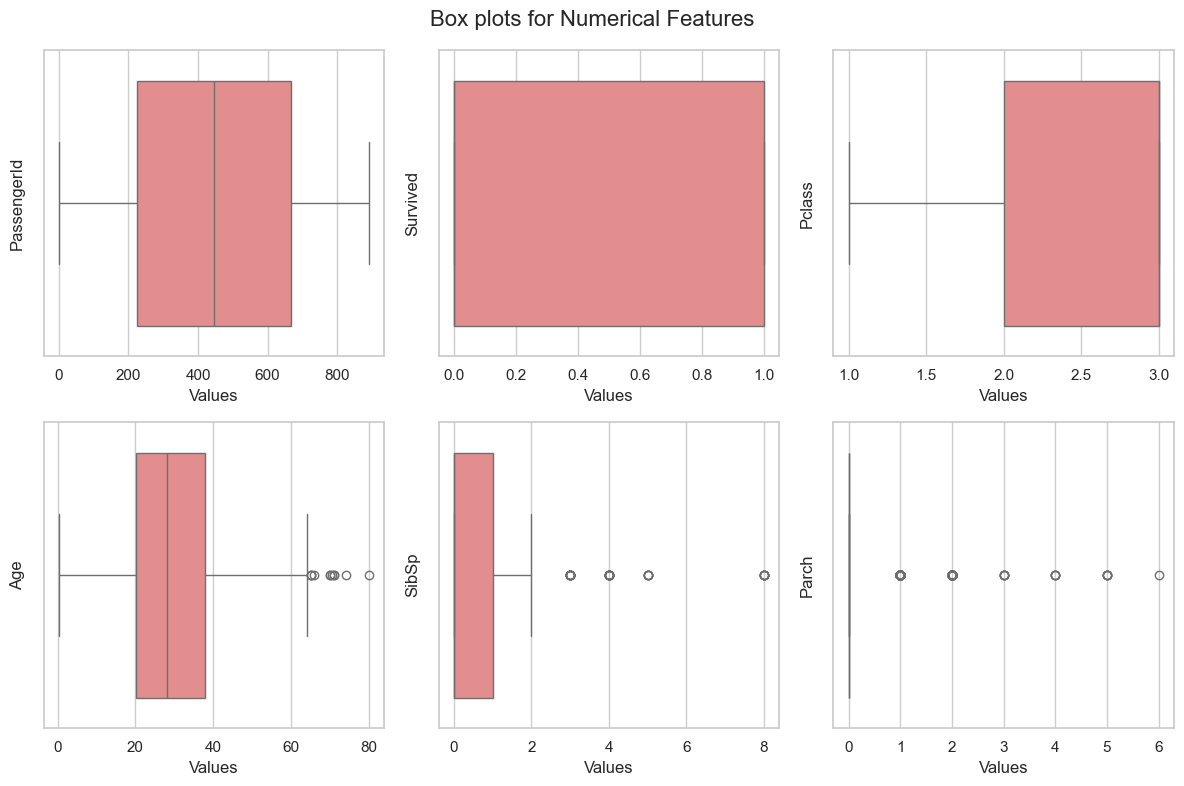

In [11]:
# Boxplots for Numeric Columns(Outlier Detection)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:6]):  # limit to first 6 numeric columns for layout
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    # plt.title(f"{col} Boxplot")
    plt.xlabel("Values")       # X-axis label
    plt.ylabel(col) 
plt.suptitle("Box plots for Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

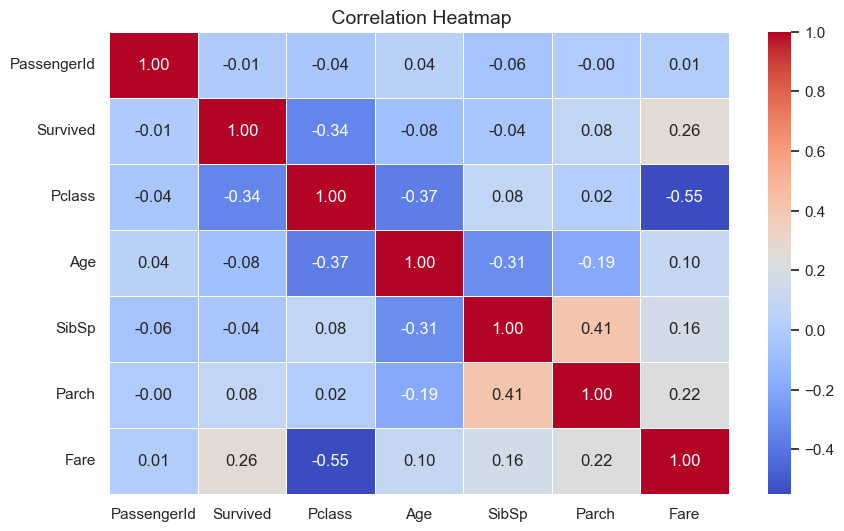

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


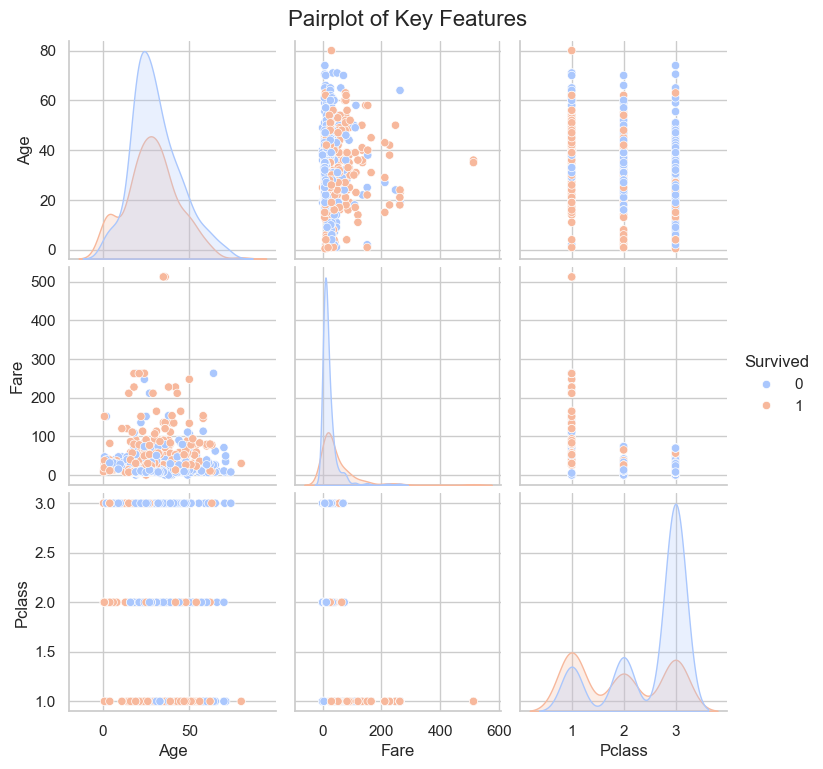

In [12]:
#  Correlation Matrix & Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(" Correlation Heatmap", fontsize=14)
plt.show()

#  Pairplot (Relationship between Key Features)
key_cols = [col for col in ['Age', 'Fare', 'Pclass', 'Survived'] if col in df.columns]
if len(key_cols) >= 2:
    sns.pairplot(df[key_cols], hue='Survived' if 'Survived' in df.columns else None, palette='coolwarm')
    plt.suptitle("Pairplot of Key Features", y=1.02, fontsize=16)
    plt.show()


 Observations and Insights:
- Females had a higher survival rate than males (Sex vs Survived).
- Passengers in higher classes (1st) had higher survival rates.
- Younger passengers survived more often than older ones.
- Fare distribution is right-skewed with few passengers paying very high fares (outliers).
- Age distribution shows most passengers were between 20–40 years old.
- Some columns have missing values, especially in Age/Cabin/Embarked.
- 3rd-class passengers dominate the dataset, showing socio-economic differences in survival.



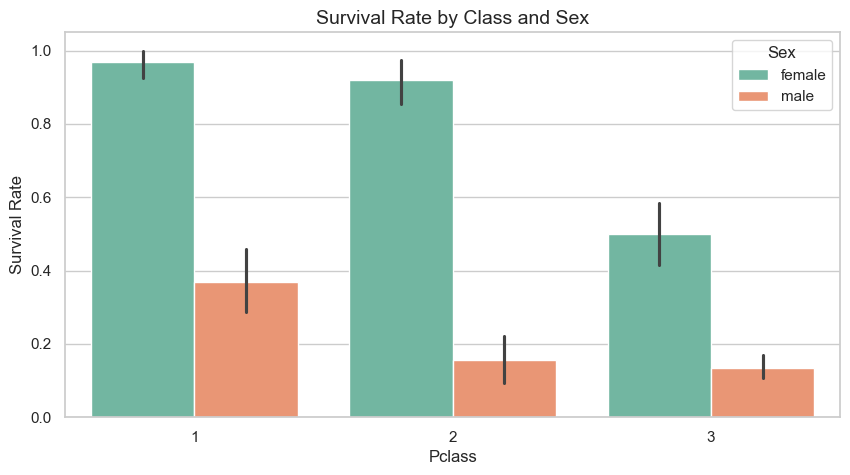

In [13]:
#  Identify Patterns, Trends, and Anomalies
print("\n Observations and Insights:")

if 'Survived' in df.columns:
    print("- Females had a higher survival rate than males (Sex vs Survived).")
    print("- Passengers in higher classes (1st) had higher survival rates.")
    print("- Younger passengers survived more often than older ones.")
if 'Fare' in df.columns:
    print("- Fare distribution is right-skewed with few passengers paying very high fares (outliers).")
if 'Age' in df.columns:
    print("- Age distribution shows most passengers were between 20–40 years old.")
if df.isnull().sum().any():
    print("- Some columns have missing values, especially in Age/Cabin/Embarked.")
print("- 3rd-class passengers dominate the dataset, showing socio-economic differences in survival.\n")

#  Extra Visualization: Survival by Sex and Class (if available)
if {'Sex', 'Survived', 'Pclass'}.issubset(df.columns):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', palette='Set2')
    plt.title("Survival Rate by Class and Sex", fontsize=14)
    plt.ylabel("Survival Rate")
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13404\941224349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', palette='Set3')


Text(0.5, 1.0, 'Titanic Survival by Age Group')

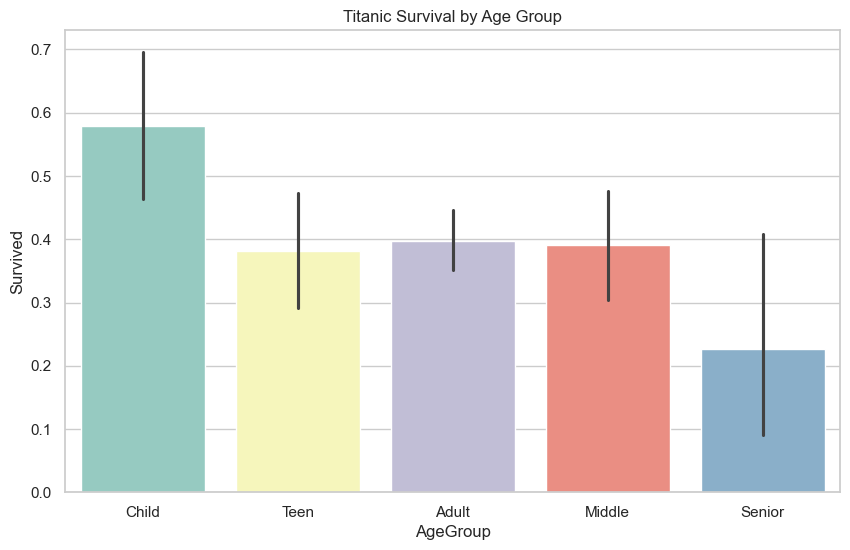

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child','Teen','Adult','Middle','Senior'])
sns.barplot(data=df, x='AgeGroup', y='Survived', palette='Set3')
plt.title("Titanic Survival by Age Group")


Text(0.5, 1.0, 'Age Distribution by Passenger Class and Survival on the Titanic')

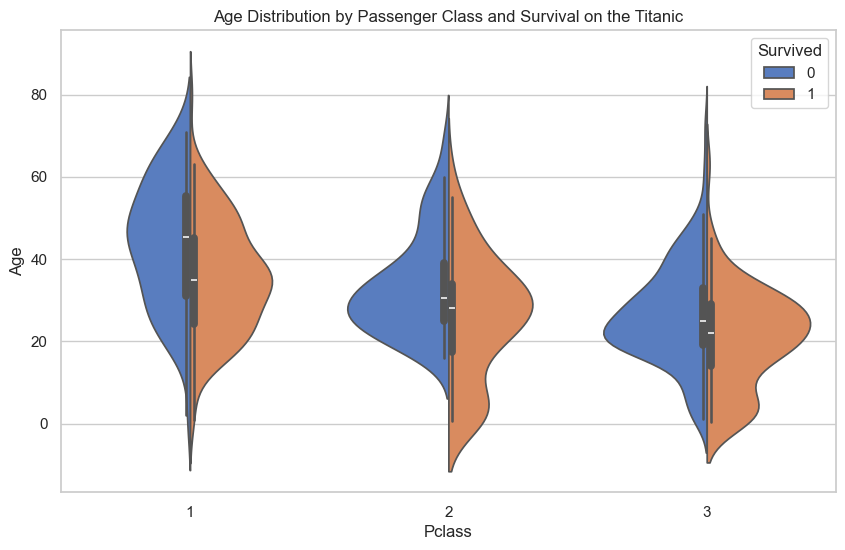

In [15]:
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title("Age Distribution by Passenger Class and Survival on the Titanic")


In [16]:
# Observation and Insight:
# The violin plot shows that first-class passengers had higher survival rates across a wide age range, while third-class passengers, mostly young adults, had the lowest survival. 
# Children had better chances of survival across all classes, reflecting evacuation priorities. 
# Overall, survival decreased with lower class and older age.